In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#preview is the first frame which is basically what we need
first_frame = cv2.imread("/content/drive/MyDrive/cvph6/first_frame.jpg")


In [ ]:
# excat co-ordinates for the frame

# ECEF format to geographical cooridnates , which gave this , top down img was extracted from this via google earth

# Latitude: 37.7143°
# Longitude: -122.4642°
# Altitude: 60.8 meters
# put in google earth and got ss

# gps_data_path = './3/global_pos/frame_positions'
# gps_data = np.load(gps_data_path)

# first_frame_gps = gps_data[0]

In [5]:
top_down_image = cv2.imread("/content/drive/MyDrive/cvph6/ph6_topdown.png")


In [6]:


points_video_frame = np.array([[740, 426],
                               [494, 418],
                               [292, 418],
                               [381, 396],
                               [522, 397]], dtype=np.float32)



points_topdown = np.array([[276, 704],
                           [231, 704],
                           [192, 706],
                           [188, 597],
                           [224, 601]], dtype=np.float32)





H, status = cv2.findHomography(points_video_frame, points_topdown)
warped_frame = cv2.warpPerspective(first_frame, H, (top_down_image.shape[1], top_down_image.shape[0]))

file_path = "/content/drive/MyDrive/cvph6/warped_final.png"
cv2.imwrite(file_path, warped_frame)



True

Part 3

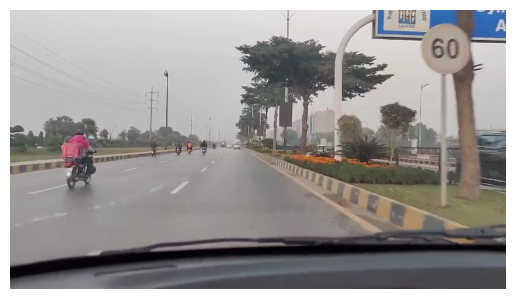

In [ ]:


video_path = './ph6.mp4'

cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error opening video file")

ret, frame = cap.read()

if ret:
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.imshow(frame_rgb)
    plt.axis('off')
    plt.show()
else:
    print("Failed to retrieve frame")

cap.release()


In [2]:
!git clone https://github.com/bimalka98/Stitch-images-using-SuperGlue-GNN.git
%cd Stitch-images-using-SuperGlue-GNN


Cloning into 'Stitch-images-using-SuperGlue-GNN'...
remote: Enumerating objects: 319, done.
remote: Total 319 (delta 0), reused 0 (delta 0), pack-reused 319
Receiving objects: 100% (319/319), 187.97 MiB | 2.12 MiB/s, done.
Resolving deltas: 100% (75/75), done.
Updating files: 100% (106/106), done.
/Users/shafaykashif/Desktop/ph6/yes/Stitch-images-using-SuperGlue-GNN


In [9]:
import cv2
import numpy as np

original_video_path = "/content/drive/MyDrive/cvph6/ph6.mp4"
cap = cv2.VideoCapture(original_video_path)

output_video_path = '/content/drive/MyDrive/cvph6/NEW_output.mp4'

ret, frame = cap.read()
height, width = frame.shape[:2]

print(f"Original Video Dimensions: {width} x {height}")
print(f"Original Video FPS: {cap.get(cv2.CAP_PROP_FPS)}")

homography_matrix = H  

fourcc = cv2.VideoWriter_fourcc(*'mp4v') 
out = cv2.VideoWriter(output_video_path, fourcc, cap.get(cv2.CAP_PROP_FPS), (width, height))

frame_number = 0
while True:
    ret, frame = cap.read()

    if not ret:
        break

    warped_frame = cv2.warpPerspective(frame, homography_matrix, (width, height))

    out.write(warped_frame)

    frame_number += 1
    print(f'Processing frame {frame_number}')

cap.release()
out.release()

print('Video processing complete!')


Original Video Dimensions: 1280 x 720
Original Video FPS: 60.0
Processing frame 1
Processing frame 2
Processing frame 3
Processing frame 4
Processing frame 5
Processing frame 6
Processing frame 7
Processing frame 8
Processing frame 9
Processing frame 10
Processing frame 11
Processing frame 12
Processing frame 13
Processing frame 14
Processing frame 15
Processing frame 16
Processing frame 17
Processing frame 18
Processing frame 19
Processing frame 20
Processing frame 21
Processing frame 22
Processing frame 23
Processing frame 24
Processing frame 25
Processing frame 26
Processing frame 27
Processing frame 28
Processing frame 29
Processing frame 30
Processing frame 31
Processing frame 32
Processing frame 33
Processing frame 34
Processing frame 35
Processing frame 36
Processing frame 37
Processing frame 38
Processing frame 39
Processing frame 40
Processing frame 41
Processing frame 42
Processing frame 43
Processing frame 44
Processing frame 45
Processing frame 46
Processing frame 47
Proces

In [ ]:
og_H = H

In [ ]:
import cv2
import numpy as np
import os
import subprocess

def extract_frames(video_path, out_dir):
    if not os.path.exists(out_dir):
        os.makedirs(out_dir)

    cap = cv2.VideoCapture(video_path)
    frame_id = 0
    width, height = None, None

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        if frame_id == 0:
            height, width = frame.shape[:2]

        frame_path = os.path.join(out_dir, f'frame_{frame_id:04d}.jpg')
        cv2.imwrite(frame_path, frame)
        frame_id += 1

    cap.release()
    return frame_id, width, height



original_video_path = "./ph6.mp4"
frames_dir = './frames'
total_frames, width, height = extract_frames(original_video_path, frames_dir)

In [ ]:
print(total_frames)

2959


In [ ]:
import cv2
import numpy as np
import os
import subprocess

def extract_frames(video_path, out_dir):
    if not os.path.exists(out_dir):
        os.makedirs(out_dir)

    cap = cv2.VideoCapture(video_path)
    frame_id = 0
    width, height = None, None

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        if frame_id == 0:
            height, width = frame.shape[:2]

        frame_path = os.path.join(out_dir, f'frame_{frame_id:04d}.jpg')
        cv2.imwrite(frame_path, frame)
        frame_id += 1

    cap.release()
    return frame_id, width, height

def loadNPZ(npz_file):
    npz = np.load(npz_file)
    point_set1 = npz['keypoints0'][npz['matches'] > -1]
    matching_indexes = npz['matches'][npz['matches'] > -1]
    point_set2 = npz['keypoints1'][matching_indexes]
    return point_set1, point_set2

def warp_frame(source_frame, H):
    height, width = source_frame.shape[:2]
    warped_frame = cv2.warpPerspective(source_frame, H, (width, height))
    return warped_frame

H_initial = H

original_video_path = "../original/video.hevc"
frames_dir = './frames'
total_frames, width, height = extract_frames(original_video_path, frames_dir)

pairs_file_path = './frame_pairs.txt'
output_dir = './output'
os.makedirs(output_dir, exist_ok=True)

first_frame_path = os.path.join(frames_dir, 'frame_0000.jpg')
first_frame = cv2.imread(first_frame_path)
warped_frame = warp_frame(first_frame, H_initial)
warped_frame_path = os.path.join(frames_dir, 'warped_frame_0000.jpg')
cv2.imwrite(warped_frame_path, warped_frame)

for frame_id in range(1, total_frames):
    current_warped_frame_path = os.path.join(frames_dir, f'warped_frame_{frame_id - 1:04d}.jpg')
    next_frame_path = os.path.join(frames_dir, f'frame_{frame_id:04d}.jpg')

    with open(pairs_file_path, 'w') as file:
        file.write(f'{current_warped_frame_path} {next_frame_path}\n')

    subprocess.run(['python', 'match_pairs.py', '--input_pairs', pairs_file_path, '--output_dir', output_dir, '--viz'])

    npz_file = os.path.join(output_dir, f'matches_{frame_id - 1:04d}.npz')
    point_set1, point_set2 = loadNPZ(npz_file)

    H_new, _ = cv2.findHomography(point_set1, point_set2, cv2.RANSAC)

    next_frame = cv2.imread(next_frame_path)

    warped_next_frame = warp_frame(next_frame, H_new)
    warped_next_frame_path = os.path.join(frames_dir, f'warped_frame_{frame_id:04d}.jpg')
    cv2.imwrite(warped_next_frame_path, warped_next_frame)

fourcc = cv2.VideoWriter_fourcc(*'mp4v') 
out_video_path = '/final/warped_video.mp4'
out_video = cv2.VideoWriter(out_video_path, fourcc, 30.0, (width, height))

for frame_id in range(total_frames):
    warped_frame_path = os.path.join(frames_dir, f'warped_frame_{frame_id:04d}.jpg')
    if os.path.exists(warped_frame_path):
        frame = cv2.imread(warped_frame_path)
        out_video.write(frame)
    else:
        break

out_video.release()


In [16]:
import os
import cv2

original_video_path = "/Users/shafaykashif/Desktop/ph6/yes/final_top_view_vid.mp4"

def extract_frames(video_path, out_dir):
    if not os.path.exists(out_dir):
        os.makedirs(out_dir)

    cap = cv2.VideoCapture(video_path)
    frame_id = 0

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        frame_path = os.path.join(out_dir, f'frame_{frame_id:04d}.jpg')
        cv2.imwrite(frame_path, frame)
        frame_id += 1
        print(frame_id)

    cap.release()
    return frame_id  

frames_dir = '/Users/shafaykashif/Desktop/ph6/yes/frames'
total_frames = extract_frames(original_video_path, frames_dir) 



1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [17]:
pairs_file_path = '/Users/shafaykashif/Desktop/ph6/yes/frame_pairs.txt'

with open(pairs_file_path, 'w') as file:
    for frame_id in range(total_frames - 1):
        first_frame = os.path.join(frames_dir, f'frame_{frame_id:04d}.jpg')
        second_frame = os.path.join(frames_dir, f'frame_{frame_id + 1:04d}.jpg')
        file.write(f'{first_frame} {second_frame}\n')


In [18]:
pairs_file = '/Users/shafaykashif/Desktop/ph6/yes/frame_pairs.txt'
output_dir = '/Users/shafaykashif/Desktop/ph6/yes/output'

!python3 match_pairs.py --input_pairs {pairs_file} --output_dir {output_dir} --viz


Namespace(input_pairs='/Users/shafaykashif/Desktop/ph6/yes/frame_pairs.txt', input_dir='assets/scannet_sample_images/', output_dir='/Users/shafaykashif/Desktop/ph6/yes/output', max_length=-1, resize=[640, 480], resize_float=False, superglue='indoor', max_keypoints=1024, keypoint_threshold=0.005, nms_radius=4, sinkhorn_iterations=20, match_threshold=0.2, viz=True, eval=False, fast_viz=False, cache=False, show_keypoints=False, viz_extension='png', opencv_display=False, shuffle=False, force_cpu=False)
Will resize to 640x480 (WxH)
Running inference on device "cpu"
Loaded SuperPoint model
Loaded SuperGlue model ("indoor" weights)
Looking for data in directory "assets/scannet_sample_images"
Will write matches to directory "/Users/shafaykashif/Desktop/ph6/yes/output"
Will write visualization images to directory "/Users/shafaykashif/Desktop/ph6/yes/output"
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torch/nn/functional.py:4296: UserWarning: Default grid_samp

Stitching frame 1 onto the panorama
Stitching frame 2 onto the panorama
Stitching frame 3 onto the panorama
Stitching frame 4 onto the panorama
Stitching frame 5 onto the panorama
Stitching frame 6 onto the panorama
Stitching frame 7 onto the panorama
Stitching frame 8 onto the panorama
Stitching frame 9 onto the panorama
Stitching frame 10 onto the panorama
Stitching frame 11 onto the panorama
Stitching frame 12 onto the panorama
Stitching frame 13 onto the panorama
Stitching frame 14 onto the panorama
Stitching frame 15 onto the panorama
Stitching frame 16 onto the panorama
Stitching frame 17 onto the panorama
Stitching frame 18 onto the panorama
Stitching frame 19 onto the panorama
Stitching frame 20 onto the panorama
Stitching frame 21 onto the panorama
Stitching frame 22 onto the panorama
Stitching frame 23 onto the panorama
Stitching frame 24 onto the panorama
Stitching frame 25 onto the panorama
Stitching frame 26 onto the panorama
Stitching frame 27 onto the panorama
Stitching 

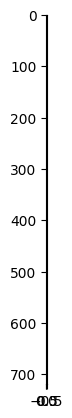

In [23]:


import numpy as np
import cv2
import matplotlib.pyplot as plt

def loadNPZ(npz_file):
    npz = np.load(npz_file)
    point_set1 = npz['keypoints0'][npz['matches'] > -1]
    matching_indexes = npz['matches'][npz['matches'] > -1]
    point_set2 = npz['keypoints1'][matching_indexes]
    return point_set1, point_set2

output_dir = '/Users/shafaykashif/Desktop/ph6/yes/output'
frames_dir = '/Users/shafaykashif/Desktop/ph6/yes/frames'
total_frames = 1200

panorama = cv2.imread(f'{frames_dir}/frame_0000.jpg', cv2.IMREAD_COLOR)

for i in range(1, 1200):
    print(f"Stitching frame {i} onto the panorama")

    npz_file = f'{output_dir}/frame_{i-1:04d}_frame_{i:04d}_matches.npz'
    point_set1, point_set2 = loadNPZ(npz_file)

    current_frame = cv2.imread(f'{frames_dir}/frame_{i:04d}.jpg', cv2.IMREAD_COLOR)
    H, _ = cv2.findHomography(point_set2, point_set1, cv2.RANSAC, 5.0)

    warped_frame = cv2.warpPerspective(current_frame, H, (panorama.shape[1] + current_frame.shape[1], panorama.shape[0]))

    new_width = warped_frame.shape[1]
    new_panorama = np.zeros((panorama.shape[0], new_width, 3), dtype=np.uint8)

    new_panorama[:, :panorama.shape[1]] = panorama
    new_panorama = np.maximum(new_panorama, warped_frame)

    panorama = new_panorama[:, :np.argmax(new_panorama.sum(axis=0) > 0) + 1]

cv2.imwrite('../final_panorama.jpg', panorama)
plt.imshow(cv2.cvtColor(panorama, cv2.COLOR_BGR2RGB))
plt.show()


In [27]:
import cv2

if panorama.shape[1] > 10000:  
    scale_factor = 10000 / panorama.shape[1]
    new_height = int(panorama.shape[0] * scale_factor)
    new_size = (10000, new_height)

    resized_panorama = cv2.resize(panorama, new_size, interpolation=cv2.INTER_AREA)

    resized_save_path = '../resized_final_panorama.jpg'
    if cv2.imwrite(resized_save_path, resized_panorama):
        print(f"Resized image successfully saved to {resized_save_path}")
    else:
        print(f"Failed to save the resized image to {resized_save_path}")
else:
    print("Panorama size seems manageable")


Resized image successfully saved to ../resized_final_panorama.jpg
